## Analysing Merck FEP+ results

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import kendalltau, pearsonr, spearmanr
import pickle

### Obtain ddG values for each ligand pair/edge in the graph

In [2]:
def format_target_name(name):
    
    if isinstance(name, str):
        
        if ' ' in name:
            name = name.replace(' ', '_')
        
        if '/' in name:
            name = name.replace('/', '_')
        
        if '.0' in name:
            name = name.replace('.0', '')
    
    if isinstance(name, float):
        return str(int(name))

    return name

In [17]:
path = "/biggin/t001/bioc1805/Git/fep-merck/data"
systems = [name for name in os.listdir(
    path) if os.path.isdir(os.path.join(path, name))]

In [18]:
# 5 ns windows
ddg_data = pd.DataFrame()
filename = "results_edges_5ns.csv"
skip = ["eg5_alternativeloop"]
exp_col = "Exp."
comp_col = "FEP"
sys_edge_data = {}
rmse = {}

for system in systems:

    if system in skip:
        continue

    edge_data = pd.read_csv(os.path.join(path, system, filename))
    edge_data['system'] = [system for i in range(len(edge_data))]
    edge_data.dropna(subset=[exp_col, comp_col], inplace=True)

    for col in ['Ligand1', 'Ligand2']:
        edge_data[col] = [str(lig_id).replace('.0', '')
                          for lig_id in edge_data[col]]

    ddg_data = pd.concat((ddg_data, edge_data))

    sys_edge_data[system] = edge_data
    mse_pw = np.square(np.subtract(
        edge_data[exp_col], edge_data[comp_col])).mean()
    rmse_pw = np.sqrt(mse_pw)
    rmse[system] = rmse_pw
    print(f"{system} | No. edges: {len(edge_data)} | RMSE_pw: {rmse_pw:.2f}")

pfkfb3 | No. edges: 66 | RMSE_pw: 1.37
cdk8 | No. edges: 54 | RMSE_pw: 1.55
shp2 | No. edges: 43 | RMSE_pw: 1.36
hif2a | No. edges: 80 | RMSE_pw: 1.52
syk | No. edges: 101 | RMSE_pw: 1.27
tnks2 | No. edges: 60 | RMSE_pw: 1.21
cmet | No. edges: 57 | RMSE_pw: 1.38
eg5 | No. edges: 65 | RMSE_pw: 1.35


In [19]:
ddg_data.set_index("system", inplace=True)
ddg_data['Ligand1'] = [format_target_name(name) for name in ddg_data['Ligand1']]
ddg_data['Ligand2'] = [format_target_name(name) for name in ddg_data['Ligand2']]
ddg_data.dropna(subset=[exp_col, comp_col], inplace=True)
ddg_data.drop(["Solvation", "Solvation Error"], axis=1, inplace=True)
ddg_data.to_csv("../data/all_ligand_edges_ddg_5ns.csv")

In [20]:
# 20 ns windows
ddg_data = pd.DataFrame()
filename = "results_edges_20ns.csv"
skip = ["eg5_alternativeloop"]
exp_col = "Exp."
comp_col = "FEP"
sys_edge_data = {}
rmse = {}

for system in systems:

    if system in skip:
        continue

    edge_data = pd.read_csv(os.path.join(path, system, filename))
    edge_data['system'] = [system for i in range(len(edge_data))]
    edge_data.dropna(subset=[exp_col, comp_col], inplace=True)

    for col in ['Ligand1', 'Ligand2']:
        edge_data[col] = [str(lig_id).replace('.0', '')
                          for lig_id in edge_data[col]]

    ddg_data = pd.concat((ddg_data, edge_data))

    sys_edge_data[system] = edge_data
    mse_pw = np.square(np.subtract(
        edge_data[exp_col], edge_data[comp_col])).mean()
    rmse_pw = np.sqrt(mse_pw)
    rmse[system] = rmse_pw
    print(f"{system} | No. edges: {len(edge_data)} | RMSE_pw: {rmse_pw:.2f}")

pfkfb3 | No. edges: 67 | RMSE_pw: 1.22
cdk8 | No. edges: 54 | RMSE_pw: 1.52
shp2 | No. edges: 56 | RMSE_pw: 1.24
hif2a | No. edges: 80 | RMSE_pw: 1.40
syk | No. edges: 101 | RMSE_pw: 1.27
tnks2 | No. edges: 60 | RMSE_pw: 1.03
cmet | No. edges: 57 | RMSE_pw: 1.22
eg5 | No. edges: 65 | RMSE_pw: 1.21


In [21]:
ddg_data.set_index("system", inplace=True)
ddg_data['Ligand1'] = [format_target_name(name) for name in ddg_data['Ligand1']]
ddg_data['Ligand2'] = [format_target_name(name) for name in ddg_data['Ligand2']]
ddg_data.dropna(subset=[exp_col, comp_col], inplace=True)
ddg_data.drop(["Solvation", "Solvation Error"], axis=1, inplace=True)
ddg_data.to_csv("../data/all_ligand_edges_ddg_20ns.csv")

### Visualise absolute predictions

In [49]:
filename = "results_20ns.csv"
skip = ["eg5_alternativeloop"]
exp_col = "exp_dG"
comp_col = "pred_dG"
sys_pred_data = {}
kts, r2s, prs, sprs = {}, {}, {}, {}

for system in systems:

    if system in skip:
        continue

    data = pd.read_csv(os.path.join(path, system, filename))
    data.columns = ['units', 'no', 'ligand', 'quality',
                    'pred_dG', 'pred_err', 'exp_dG', 'structure']
    data.dropna(subset=[exp_col, comp_col], inplace=True)

    kt = kendalltau(data[exp_col], data[comp_col])
    kts[system] = kt

    r2 = r2_score(data[exp_col], data[comp_col],)
    r2s[system] = r2

    pr = pearsonr(data[exp_col], data[comp_col])[0]
    prs[system] = pr

    spr = spearmanr(data[exp_col], data[comp_col])[0]
    sprs[system] = spr

    sys_pred_data[system] = data

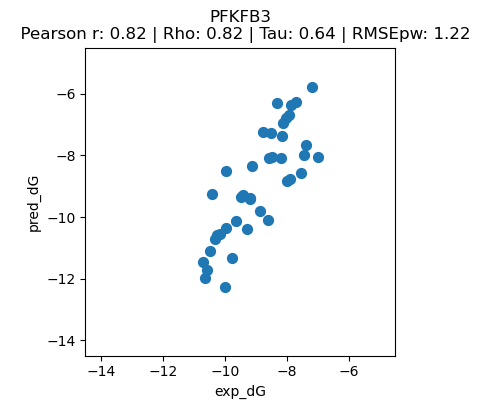

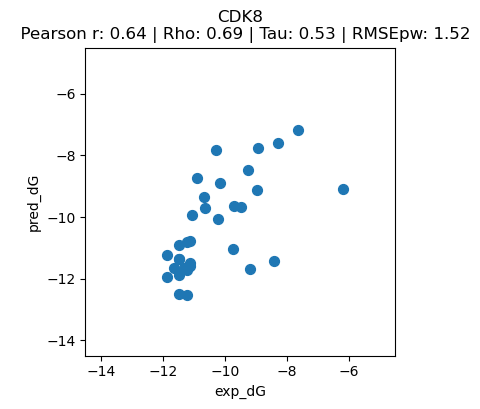

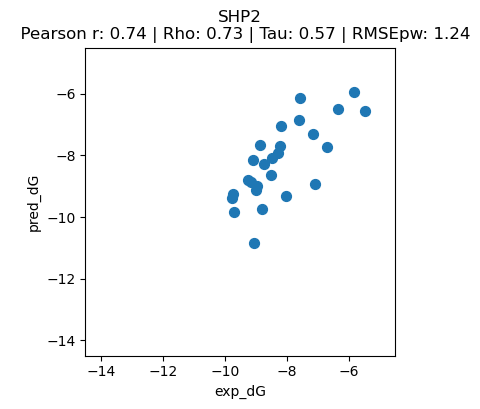

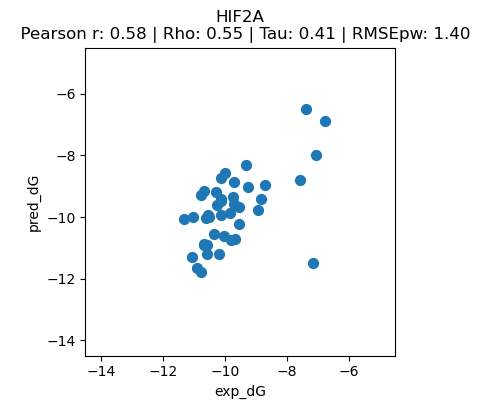

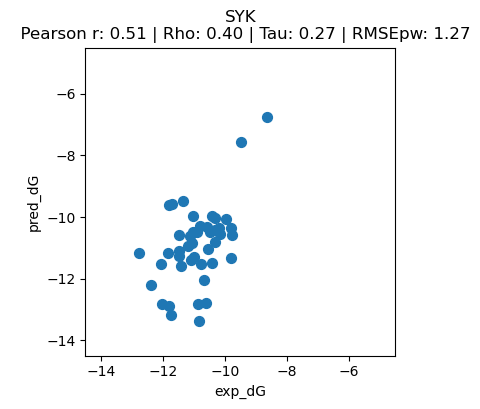

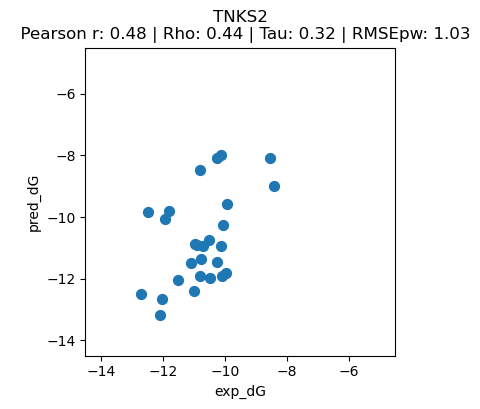

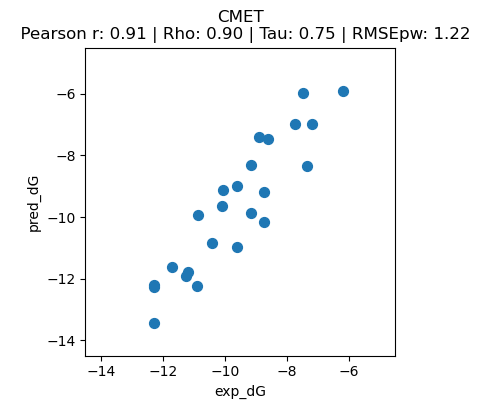

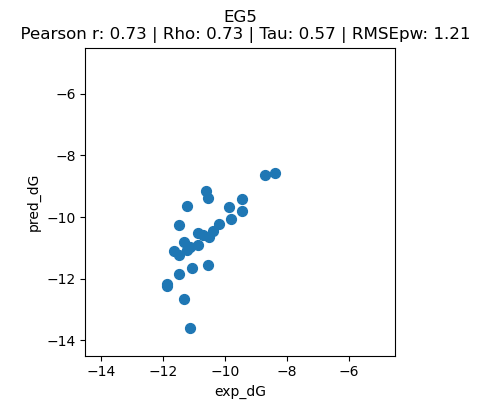

In [54]:
for system in systems:
    if system in skip:
        continue
    sys_pred_data[system].plot.scatter(
        x="exp_dG",
        y="pred_dG",
        figsize=(4, 4),
        s=50,
        xlim=(-14.5, -4.5),
        ylim=(-14.5, -4.5),
        title=f"{str.upper(system)}\n  Pearson r: {prs[system]:.2f} | Rho: {sprs[system]:.2f} | Tau: {kts[system][0]:.2f} | RMSEpw: {rmse[system]:.2f}"
    )

### Ligand features

In [14]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pickle
import pandas as pd

In [15]:
def compute_molecular_properties(mol, return_dict=False):
    """
    Compute molecular properties for a given RDKit molecule object (mol).
    
    Parameters:
    - mol: RDMol object
    
    Returns:
    A dictionary with the following keys:
    - 'MolecularWeight': Molecular weight of the molecule
    - 'NumHeavyAtoms': Number of heavy (non-hydrogen) atoms
    - 'NumRotatableBonds': Number of rotatable bonds
    - 'NumHDonors': Number of hydrogen bond donors
    - 'NumHAcceptors': Number of hydrogen bond acceptors
    - 'LogP': LogP value of the molecule
    """
    if return_dict:
        properties = {
            'MolecularWeight': Descriptors.MolWt(mol),
            'NumHeavyAtoms': Lipinski.HeavyAtomCount(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
            'NumHDonors': Lipinski.NumHDonors(mol),
            'NumHAcceptors': Lipinski.NumHAcceptors(mol),
            'LogP': Descriptors.MolLogP(mol),
            'Elements' : set([atom.GetSymbol() for atom in mol.GetAtoms()])
        }

        return properties

    else:
        return [Descriptors.MolWt(mol), Lipinski.HeavyAtomCount(mol), Descriptors.NumRotatableBonds(mol), Lipinski.NumHDonors(mol), Lipinski.NumHAcceptors(mol), Descriptors.MolLogP(mol), set([atom.GetSymbol() for atom in mol.GetAtoms()])]

In [16]:
ligand_mol_dict = pickle.load(open('../data/all_ligands_mol_dict.pkl', 'rb'))

In [19]:
target_properties_df = pd.DataFrame()

for target in ligand_mol_dict:

    target_properties = [0, 0, 0, 0, 0, 0]
    target_elements = set()

    for ligand in ligand_mol_dict[target]:
        properties = compute_molecular_properties(ligand_mol_dict[target][ligand]['rdmol'], return_dict=False)
        elements = properties[-1]
        properties = properties[:-1]

        target_properties = [sum(x) for x in zip(target_properties, properties)]
        target_elements = target_elements.union(elements)

    target_properties = [prop/len(ligand_mol_dict[target]) for prop in target_properties]
    target_properties.insert(0, target)
    target_properties.append(target_elements)

    target_properties_df = pd.concat([target_properties_df, pd.DataFrame(target_properties).T])

target_properties_df.columns = ['Target', 'MolecularWeight', 'NumHeavyAtoms', 'NumRotatableBonds', 'NumHDonors', 'NumHAcceptors', 'LogP', 'Elements']

target_properties_df.set_index('Target', inplace=True)
target_properties_df.to_csv('../data/ligand_properties.csv')


In [20]:
target_properties_df

,MolecularWeight,NumHeavyAtoms,NumRotatableBonds,NumHDonors,NumHAcceptors,LogP,Elements
Target,,,,,,,
pfkfb3,423.7565,30.325,5.875,1.15,6.8,4.511731,"{Br, C, F, O, S, H, N}"
cdk8,369.039091,27.515152,5.878788,1.727273,4.393939,3.056247,"{C, F, O, S, H, N}"
shp2,353.838692,23.192308,5.307692,2.076923,4.230769,2.373617,"{C, Br, Cl, O, S, H, N}"
eg5_alternativeloop,410.220536,28.785714,5.321429,2.25,3.0,4.214194,"{C, Br, F, Cl, O, S, H, N}"
hif2a,392.9265,25.880952,5.047619,1.071429,4.738095,3.569408,"{C, F, Cl, O, S, H, N}"
syk,432.58175,32.295455,7.75,2.113636,7.477273,4.034652,"{C, F, O, S, H, N}"
tnks2,313.765704,23.0,4.62963,1.814815,2.925926,2.883512,"{C, F, Cl, O, H, N}"
cmet,432.744458,31.458333,8.125,0.875,5.666667,3.338513,"{C, F, Cl, O, S, H, N}"
eg5,410.220536,28.785714,5.321429,2.25,3.0,4.214194,"{C, Br, F, Cl, O, S, H, N}"
